In [23]:
# Import Libraries

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import numpy as np 
import seaborn as sns

In [ ]:
# Set up data generators with resizing and augmentation

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
  r'D:\UNI (2)\Brain Tumor Project\split_dataset\train',
    target_size=(150,150),
    batch_size=8,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
r'D:\UNI (2)\Brain Tumor Project\split_dataset\val',
    target_size=(150,150),
    batch_size=8,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 2684 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [25]:
# Print shapes after resizing

for data_batch, labels_batch in train_generator:
    print('Training data batch shape: ', data_batch.shape)
    break
for data_batch, labels_batch in validation_generator:
    print('Validation data batch shape:', data_batch.shape)
    break

Training data batch shape:  (16, 150, 150, 3)
Validation data batch shape: (16, 150, 150, 3)


In [26]:
# Define the CNN model 

model = Sequential([
    Conv2D(32,(3,3), padding='same', input_shape=(150,150,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


c:\Users\Dell\Downloads\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,330,881 (81.37 MB)

 Trainable params: 21,329,409 (81.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [28]:
# Train the model 
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)


history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=40,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)
)

Epoch 1/40


c:\Users\Dell\Downloads\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


168/168 ━━━━━━━━━━━━━━━━━━━━ 94s 543ms/step - accuracy: 0.7238 - loss: 0.7005 - val_accuracy: 0.8261 - val_loss: 0.5124
Epoch 2/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/40


c:\Users\Dell\Downloads\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


168/168 ━━━━━━━━━━━━━━━━━━━━ 77s 454ms/step - accuracy: 0.8052 - loss: 0.4397 - val_accuracy: 0.7391 - val_loss: 1.1407
Epoch 4/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 77s 454ms/step - accuracy: 0.8377 - loss: 0.3702 - val_accuracy: 0.7391 - val_loss: 0.7874
Epoch 6/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 77s 457ms/step - accuracy: 0.8360 - loss: 0.3992 - val_accuracy: 0.8261 - val_loss: 0.3788
Epoch 8/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 77s 453ms/step - accuracy: 0.8494 - loss: 0.3620 - val_accuracy: 0.8696 - val_loss: 0.2929
Epoch 10/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 77s 456ms/step - accuracy: 0.8566 - loss: 0.3200 - val_accuracy: 

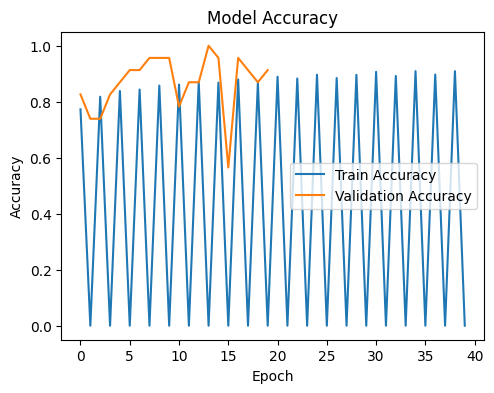

In [32]:
# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

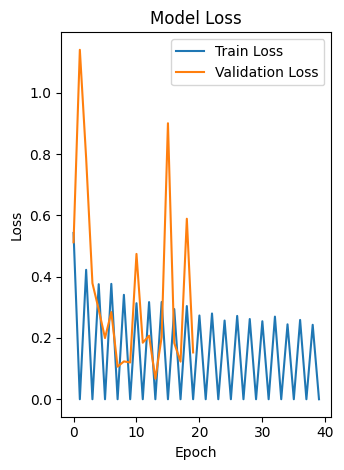

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Confusion Matrix:
[[12  0]
 [ 0 11]]
F1 Score: 1.0
Accuracy: 1.0


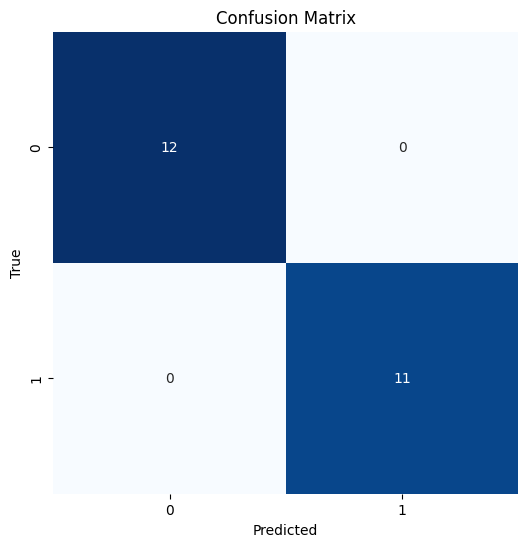

In [34]:
# Evaluate the model: Compute F1 score, accuracy, and confusion matrix
y_pred = model.predict(validation_generator)
y_pred = (y_pred > 0.5).astype(int).flatten()
y_true = validation_generator.classes

# Confusion Matrix (Error Rate Matrix)
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# F1 Score
f1 = f1_score(y_true, y_pred)
print('F1 Score:', f1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
model.save('final_model.h5')

In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define image size (consistent with the trained model)
img_height, img_width = 150, 150

# Load the pre-trained model
model_path = r'D:\UNI (2)\Brain Tumor Project\final_model.h5'  # Replace with the path to your saved model
model = tf.keras.models.load_model(model_path)

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image and resize to 150x150
    img = load_img(image_path, target_size=(img_height, img_width))
    # Convert the image to an array
    img_array = img_to_array(img)
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    # Add batch dimension (model expects shape: (1, 150, 150, 3))
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Path to your test image
image_path = r'D:\UNI (2)\Brain Tumor Project\split_dataset\train\tumor\tumor (11)_aug0.jpg'  # Replace with the path to your image

# Preprocess the image
processed_image = preprocess_image(image_path)
print(f"Processed image shape: {processed_image.shape}")

# Make prediction
prediction = model.predict(processed_image)
prediction_prob = prediction[0][0]  # Probability score (0 to 1)
prediction_class = "healthy" if prediction_prob < 0.5 else "tumor"  # Threshold at 0.5

# Output the result
print(f"\nPrediction Probability: {prediction_prob:.4f}")
print(f"Prediction: This image is {prediction_class}")

# Optional: Confidence level
confidence = prediction_prob if prediction_class == "tumor" else 1 - prediction_prob
print(f"Confidence: {confidence:.4f}")

Processed image shape: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Prediction Probability: 0.1628
Prediction: This image is healthy
Confidence: 0.8372


Found 3354 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
Shapes after resizing:
Training data batch shape: (8, 150, 150, 3)
Test data batch shape: (8, 150, 150, 3)
Total training samples: 3354

Training Fold 1/5


c:\Users\Dell\Downloads\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 81s 234ms/step - accuracy: 0.6907 - loss: 0.6897 - val_accuracy: 0.5052 - val_loss: 1.8221
Epoch 2/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 76s 226ms/step - accuracy: 0.7679 - loss: 0.4954 - val_accuracy: 0.7928 - val_loss: 0.4466
Epoch 3/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 75s 224ms/step - accuracy: 0.8028 - loss: 0.4347 - val_accuracy: 0.7452 - val_loss: 0.5079
Epoch 4/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 72s 213ms/step - accuracy: 0.8206 - loss: 0.3964 - val_accuracy: 0.6438 - val_loss: 0.8583
Epoch 5/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 70s 210ms/step - accuracy: 0.8262 - loss: 0.3906 - val_accuracy: 0.8003 - val_loss: 0.4650
Epoch 6/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 69s 204ms/step - accuracy: 0.8495 - loss: 0.3558 - val_accuracy: 0.8510 - val_loss: 0.3437
Epoch 7/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 72s 214ms/step - accuracy: 0.8747 - loss: 0.2943 - val_accuracy: 0.8778 - val_loss: 0.3039
Epoch 8/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 73s 218ms/step - accuracy: 0.8639 - loss: 0

Model saved as 'final_model.h5'
 1/16 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step

c:\Users\Dell\Downloads\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step

Test Data Evaluation:
Confusion Matrix:
[[57  5]
 [10 49]]
F1 Score: 0.8673
Accuracy: 0.8760


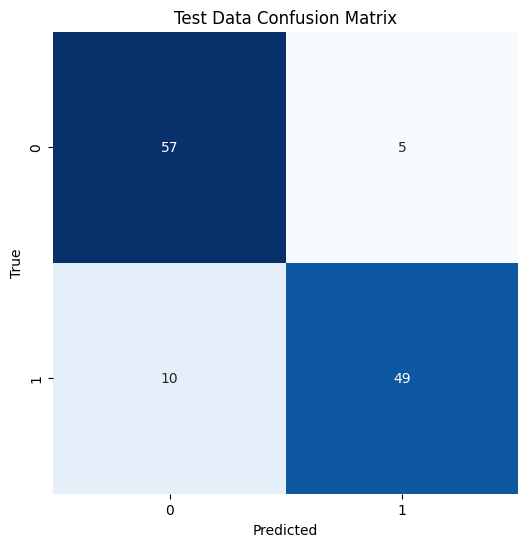


Model Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,135,621 (122.59 MB)

 Trainable params: 10,711,553 (40.86 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 21,423,108 (81.72 MB)

In [ ]:




#################################################S

####################### The best model ####################

###################################################

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define image size and batch size
img_height, img_width = 150, 150
batch_size = 8

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test data
train_generator = datagen.flow_from_directory(
    R'D:\UNI (2)\Brain Tumor Project\split_dataset\train',          
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    R'D:\UNI (2)\Brain Tumor Project\split_dataset\test',     
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Print shapes
print("Shapes after resizing:")
for data_batch, _ in train_generator:
    print(f"Training data batch shape: {data_batch.shape}")
    break
for data_batch, _ in test_generator:
    print(f"Test data batch shape: {data_batch.shape}")
    break

# Extract all training data for K-fold
all_images = []
all_labels = []
for i in range(len(train_generator)):
    imgs, lbls = next(train_generator)
    all_images.append(imgs)
    all_labels.append(lbls)
all_images = np.concatenate(all_images)
all_labels = np.concatenate(all_labels)
print(f"Total training samples: {len(all_labels)}")

# Define a more complex CNN model to address underfitting
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(img_height, img_width, 3)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), padding='same'),  # Added layer
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256),  # Increased size
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),  # Reduced from 0.5
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold = 1
val_accuracies = []

for train_idx, val_idx in kf.split(all_images):
    print(f"\nTraining Fold {fold}/{k}")
    X_train, X_val = all_images[train_idx], all_images[val_idx]
    y_train, y_val = all_labels[train_idx], all_labels[val_idx]

    model = create_model()
    history = model.fit(
        X_train, y_train,
        epochs=30,  # Increased epochs
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=1
    )
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    val_accuracies.append(val_acc)
    print(f"Fold {fold} - Validation Accuracy: {val_acc:.4f}")
    fold += 1

print(f"\nAverage Validation Accuracy: {np.mean(val_accuracies):.4f} (±{np.std(val_accuracies):.4f})")

# Train final model on all data
final_model = create_model()
final_model.fit(all_images, all_labels, epochs=30, batch_size=batch_size, verbose=1)

# Save the model for testing
final_model.save('final_model.h5')
print("Model saved as 'final_model.h5'")

# Test on test data
y_test_pred = final_model.predict(test_generator)
y_test_pred = (y_test_pred > 0.5).astype(int).flatten()
y_test_true = test_generator.classes

# Evaluation metrics
cm = confusion_matrix(y_test_true, y_test_pred)
f1 = f1_score(y_test_true, y_test_pred)
accuracy = accuracy_score(y_test_true, y_test_pred)

print("\nTest Data Evaluation:")
print("Confusion Matrix:")
print(cm)
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print model summary
print("\nModel Summary:")
final_model.summary()

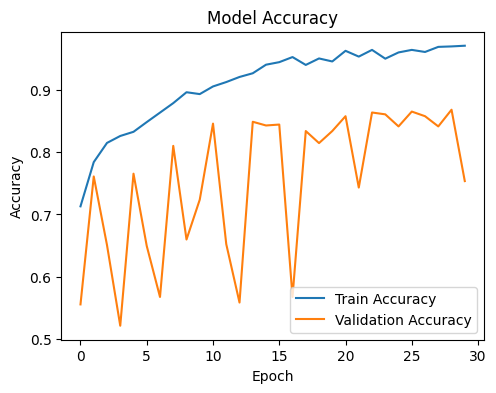

In [74]:
# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

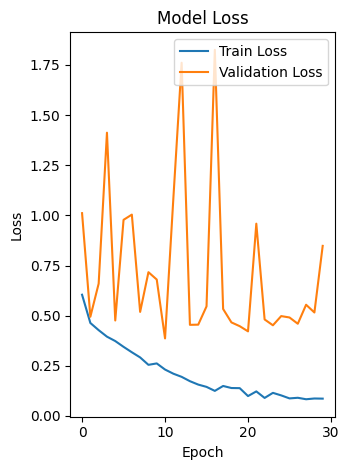

In [75]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define image size
img_height, img_width = 150, 150

# Load the saved model
model_path = r'D:\UNI (2)\Brain Tumor Project\final_model.h5'  # Path to the saved model
model = tf.keras.models.load_model(model_path)

# Function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Path to your test image
image_path = r'D:\UNI (2)\Brain Tumor Project\split_dataset\test\tumor\tumor (314).jpg'  # Replace with your image path

# Preprocess and predict
processed_image = preprocess_image(image_path)
print(f"Processed image shape: {processed_image.shape}")

prediction = model.predict(processed_image)
prediction_prob = prediction[0][0]
prediction_class = "healthy" if prediction_prob < 0.5 else "tumor"

print(f"\nPrediction Probability: {prediction_prob:.4f}")
print(f"Prediction: This image is {prediction_class}")
confidence = prediction_prob if prediction_class == "tumor" else 1 - prediction_prob
print(f"Confidence: {confidence:.4f}")

Processed image shape: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

Prediction Probability: 0.9997
Prediction: This image is tumor
Confidence: 0.9997


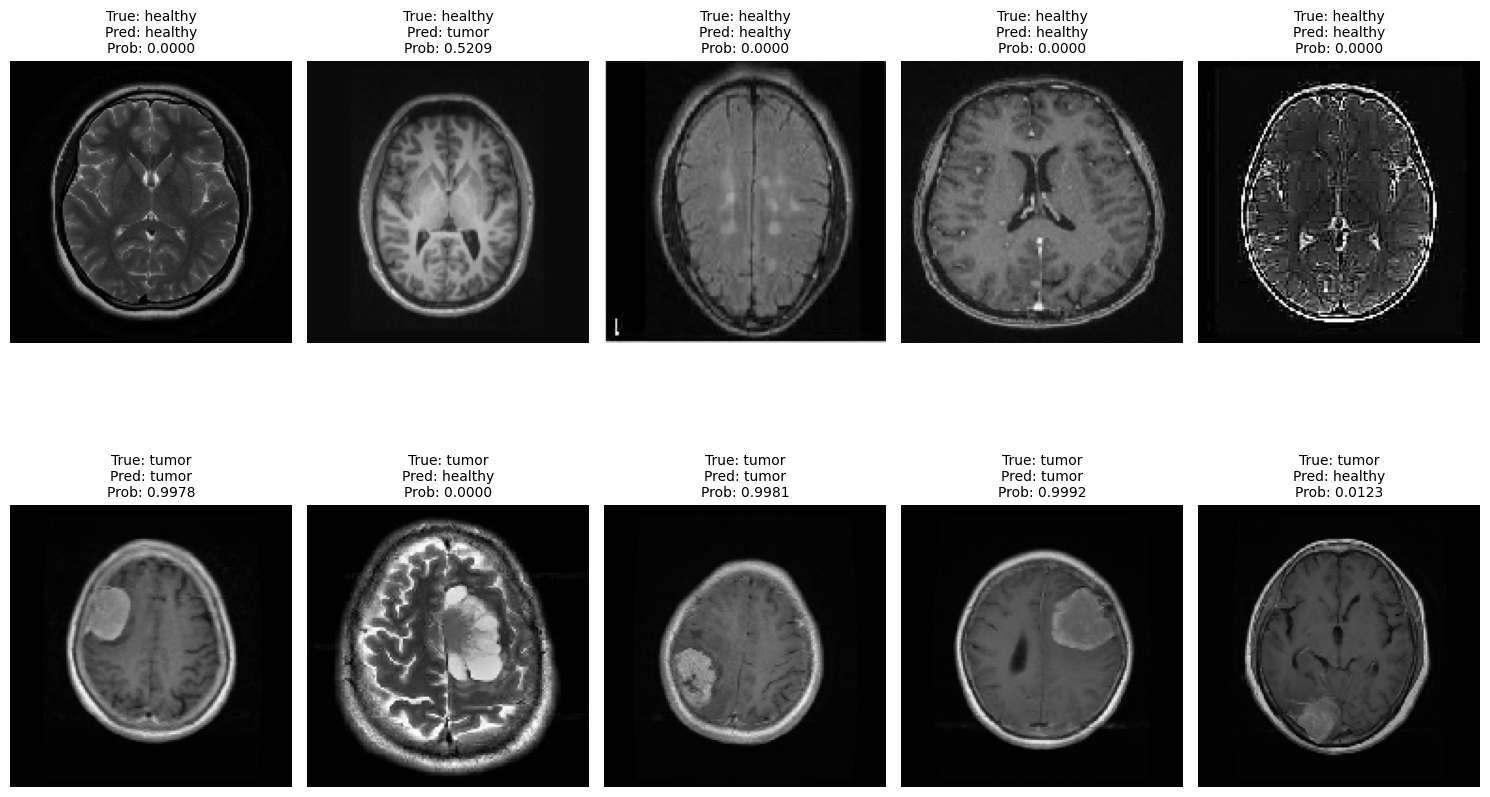


Summary of Predictions:
Sample 1: healthy (212).jpg
  True Label: healthy
  Predicted: healthy (Probability: 0.0000)
Sample 2: healthy (38).jpg
  True Label: healthy
  Predicted: tumor (Probability: 0.5209)
Sample 3: healthy (327).jpg
  True Label: healthy
  Predicted: healthy (Probability: 0.0000)
Sample 4: healthy (32).jpg
  True Label: healthy
  Predicted: healthy (Probability: 0.0000)
Sample 5: healthy (357).jpg
  True Label: healthy
  Predicted: healthy (Probability: 0.0000)
Sample 6: tumor (203).jpg
  True Label: tumor
  Predicted: tumor (Probability: 0.9978)
Sample 7: tumor (225).jpg
  True Label: tumor
  Predicted: healthy (Probability: 0.0000)
Sample 8: tumor (88).jpg
  True Label: tumor
  Predicted: tumor (Probability: 0.9981)
Sample 9: tumor (119).jpg
  True Label: tumor
  Predicted: tumor (Probability: 0.9992)
Sample 10: tumor (129).jpg
  True Label: tumor
  Predicted: healthy (Probability: 0.0123)


In [77]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Define image size (consistent with the trained model)
img_height, img_width = 150, 150

# Load the pre-trained model
model_path = r'D:\UNI (2)\Brain Tumor Project\final_model.h5'  # Replace with the path to your saved model
model = tf.keras.models.load_model(model_path)

# Directory paths to your test data
test_data_dir = r'D:\UNI (2)\Brain Tumor Project\split_dataset\val'  
healthy_dir = os.path.join(test_data_dir, 'healthy')
tumor_dir = os.path.join(test_data_dir, 'tumor')

# Function to preprocess an image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Get list of image files
healthy_images = [os.path.join(healthy_dir, f) for f in os.listdir(healthy_dir) if f.endswith(('.jpg', '.png'))]
tumor_images = [os.path.join(tumor_dir, f) for f in os.listdir(tumor_dir) if f.endswith(('.jpg', '.png'))]

# Select 5 random samples from each class
num_samples_per_class = 5
random_healthy = random.sample(healthy_images, min(num_samples_per_class, len(healthy_images)))
random_tumor = random.sample(tumor_images, min(num_samples_per_class, len(tumor_images)))

# Combine samples and their true labels
test_samples = random_healthy + random_tumor
true_labels = ['healthy'] * len(random_healthy) + ['tumor'] * len(random_tumor)

# Predict and display results
plt.figure(figsize=(15, 10))  # Adjust figure size for 10 images

for i, (image_path, true_label) in enumerate(zip(test_samples, true_labels)):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    
    # Make prediction
    prediction = model.predict(processed_image, verbose=0)
    pred_prob = prediction[0][0]
    pred_label = "healthy" if pred_prob < 0.5 else "tumor"
    
    # Load original image for display (without preprocessing)
    img = load_img(image_path, target_size=(img_height, img_width))
    
    # Create subplot
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    
    # Display true label and prediction
    plt.title(f"True: {true_label}\nPred: {pred_label}\nProb: {pred_prob:.4f}", fontsize=10)
    
# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print summary of predictions
print("\nSummary of Predictions:")
for i, (image_path, true_label) in enumerate(zip(test_samples, true_labels)):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image, verbose=0)
    pred_prob = prediction[0][0]
    pred_label = "healthy" if pred_prob < 0.5 else "tumor"
    print(f"Sample {i+1}: {os.path.basename(image_path)}")
    print(f"  True Label: {true_label}")
    print(f"  Predicted: {pred_label} (Probability: {pred_prob:.4f})")